# Solemene N°2 Jaime Garcia

Objetivo específico: Realizar una comparativa de las características de agrupamiento que se desarrollan en el algoritmo K-means y agglomerativeClustering.

Objetivo: Usando el conjunto de datos dado, desarrollará un modelo predictivo para predecir qué pacientes diabéticos hospitalizados serán readmitidos por su condición en una fecha posterior y utilizará un enfoque de K-Means para proponer un conjunto no trivial de grupos de pacientes.

# Importacion de Librerias necesarias para el algoritmo

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

### Llamado al dataframe

In [72]:
data = pd.read_csv('ejemplo.csv') 

### Visualizanción incial del DataFrame

In [73]:
data = pd.DataFrame(data)
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [74]:
 data.shape

(998, 50)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              998 non-null    int64 
 1   patient_nbr               998 non-null    int64 
 2   race                      998 non-null    object
 3   gender                    998 non-null    object
 4   age                       998 non-null    object
 5   weight                    998 non-null    object
 6   admission_type_id         998 non-null    int64 
 7   discharge_disposition_id  998 non-null    int64 
 8   admission_source_id       998 non-null    int64 
 9   time_in_hospital          998 non-null    int64 
 10  payer_code                998 non-null    object
 11  medical_specialty         998 non-null    object
 12  num_lab_procedures        998 non-null    int64 
 13  num_procedures            998 non-null    int64 
 14  num_medications           

In [76]:
for feature in data.columns:
    null = [x for x in data[feature] if x == '?']
    print('Total de valores nulos de', feature, '=', len(null))

Total de valores nulos de encounter_id = 0
Total de valores nulos de patient_nbr = 0
Total de valores nulos de race = 31
Total de valores nulos de gender = 0
Total de valores nulos de age = 0
Total de valores nulos de weight = 998
Total de valores nulos de admission_type_id = 0
Total de valores nulos de discharge_disposition_id = 0
Total de valores nulos de admission_source_id = 0
Total de valores nulos de time_in_hospital = 0
Total de valores nulos de payer_code = 998
Total de valores nulos de medical_specialty = 322
Total de valores nulos de num_lab_procedures = 0
Total de valores nulos de num_procedures = 0
Total de valores nulos de num_medications = 0
Total de valores nulos de number_outpatient = 0
Total de valores nulos de number_emergency = 0
Total de valores nulos de number_inpatient = 0
Total de valores nulos de diag_1 = 1
Total de valores nulos de diag_2 = 9
Total de valores nulos de diag_3 = 34
Total de valores nulos de number_diagnoses = 0
Total de valores nulos de max_glu_s

In [77]:
targets = data.readmitted

### Remplazando las variables categoricas como genero  y readmicion por variables numericas 

In [78]:
targets = targets.replace('NO',0).replace('>30',1).replace('<30',2)

In [79]:
data['gender'] = data['gender'].replace('Female',0).replace('Male',1)

In [80]:
data = data[data['gender'] !=  'Unknown/Invalid']
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,0,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,0,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,0,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,1,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,1,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [81]:
data = data[['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','gender']]

### Se seleccionan las columnas de interes

In [82]:
data_selected = data.iloc[:, 3:5].values
pd.DataFrame(data_selected)

,0,1
0,0,0
1,0,0
2,2,0
3,0,0
4,0,0
...,...,...
993,0,0
994,0,0
995,0,0
996,0,0


### Obtener el clúster a través del Dendrograma

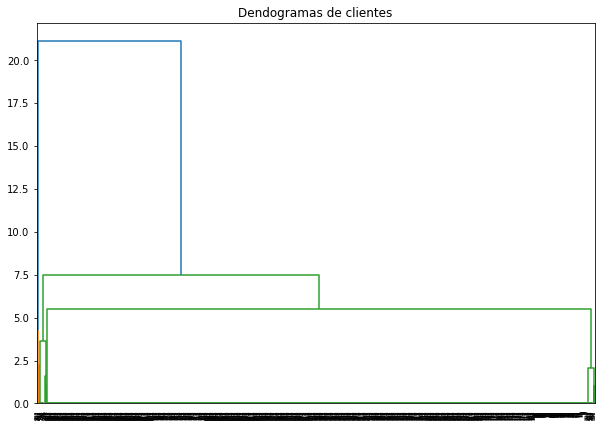

In [91]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendogramas de pacientes")
dend = shc.dendrogram(shc.linkage(data_selected, method='ward'))

Respecto a las 2 categorias que existen se puede apreciar como el dendrograma arroja en total 3 clusters

In [92]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster.fit_predict(data)


array([4, 3, 2, 1, 3, 4, 0, 0, 0, 1, 1, 3, 3, 1, 3, 0, 1, 4, 1, 1, 0, 4,
       1, 1, 2, 4, 0, 4, 3, 3, 0, 3, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 3,
       0, 2, 4, 2, 0, 0, 4, 1, 3, 3, 3, 3, 1, 4, 3, 2, 1, 1, 3, 3, 3, 1,
       3, 4, 4, 3, 0, 0, 4, 1, 1, 3, 3, 3, 4, 1, 4, 3, 3, 3, 3, 4, 0, 2,
       0, 1, 4, 1, 4, 4, 0, 2, 0, 0, 3, 0, 1, 0, 2, 3, 4, 4, 0, 4, 1, 1,
       0, 1, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 1,
       0, 3, 4, 0, 3, 1, 0, 3, 1, 1, 1, 4, 0, 3, 3, 2, 2, 0, 4, 1, 3, 0,
       4, 1, 1, 4, 1, 3, 4, 1, 1, 4, 3, 1, 0, 2, 4, 4, 3, 1, 1, 3, 4, 1,
       3, 0, 1, 4, 3, 3, 1, 4, 1, 1, 1, 3, 1, 1, 3, 0, 3, 4, 3, 4, 3, 0,
       0, 1, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 4, 4, 3, 1, 4,
       0, 0, 4, 3, 3, 1, 4, 4, 3, 4, 1, 0, 1, 0, 1, 3, 1, 0, 3, 3, 3, 4,
       1, 3, 1, 0, 1, 3, 1, 4, 0, 2, 1, 4, 3, 0, 2, 0, 0, 3, 4, 0, 1, 4,
       4, 1, 3, 4, 3, 0, 1, 0, 4, 0, 0, 3, 3, 1, 3, 0, 0, 0, 2, 0, 4, 0,
       1, 4, 1, 1, 4, 0, 3, 3, 3, 0, 1, 0, 4, 3, 3,

In [93]:
#Se define el algoritmo con 3 clusters
algoritmo = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')

In [94]:
algoritmo.fit(data)

AgglomerativeClustering(n_clusters=3)

In [95]:
pca_model = PCA(n_components = 2)
pca_model.fit(data)
pca = pca_model.transform(data) 
principalDf = pd.DataFrame(data = pca
             , columns = ['d1', 'd2'])

In [96]:
df_cluster = pd.DataFrame()
df_cluster['targets']= algoritmo.labels_ 
final = pd.concat([principalDf,df_cluster ], axis = 1)

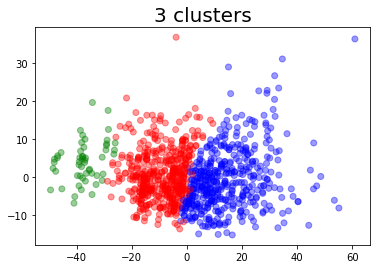

In [97]:
etiquetas = algoritmo.labels_
colores = ['blue', 'red', 'green']
colores_cluster = [colores[etiquetas[i]] for i in range(len(pca))]
plt.scatter(pca[:, 0], pca[:, 1], c = colores_cluster, marker = 'o',alpha = 0.4)
columnas = data.columns
plt.title("3 clusters", fontsize="20")
plt.show()

### Análisis del gráfico
Es posible ver los puntos de datos en forma de tres grupos.
Los puntos de datos en la parte inferior derecha pertenecen a los pacientes con mas probabilidad de reingresar al recinto hospitalitario.
Se puede apreciar los outliers que contiene el dataset, en donde por motivos de tiempos no se realizo una limpieza exhaustiva para quitar estos datos anomalos.


In [98]:
print(classification_report(targets,algoritmo.labels_))

              precision    recall  f1-score   support

           0       0.47      0.45      0.46       487
           1       0.42      0.49      0.45       417
           2       0.04      0.02      0.03        94

    accuracy                           0.42       998
   macro avg       0.31      0.32      0.31       998
weighted avg       0.41      0.42      0.41       998



## Conclusiones
Habrá un 53% de falsos negativos de pacientes de los que no serán reingresados al recinto 
de salud pero que el modelo los considero que poseen entre menor a 30% y 30 mayor%  con posibilidad de 
reincorporarse y en realidad no lo hacen. Mientras que los pacientes con mayor a un 30% de reingresar solo tendrá efectividad en un 42% y obtendra el resto en falsos positivos. Asimismo con los pacientes que presentan menos de un 30% de reingreso que tan solo obtuvo un 4%. Esto se debe a que se tuvo que reducir en gran cantidad dataset por motivos de trabajar en igualdad de condiciones para los dos desarrollos de modelos y por tiempos educacionales. Sin embargo el desarrollo por medio de Agglometarive Clustering tuvo resultados mas precisos y con mayor rendimiento a diferencia de Kmeans, ya que en el escenario en que se trabaja de conjuntos de datos bajos es ideal para Agglometarive Clustering